#   QUESTION 1

*SET UP*

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import random


In [3]:
# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

# Run this code. It will create a csv file containing a random sample of 300 respondents. You will answer the questions below based on this sample.

# Look at the code below. Now replace 'Name.csv' with your actual name (e.g., 'Sara.csv'). The code will generate a csv file that you need to submit in the zip folder as secondary file.

try:
    df = pd.read_csv('Eman.csv')        # replace Name with your own name
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/mental_health_finaldata_1.csv")
    df1=original_data.sample(300)
    df1.to_csv('Eman.csv')                   
    df = pd.read_csv('Eman.csv')             
    df = pd.DataFrame(df)
    df.to_csv('Eman.csv')                    

df.head()

,Unnamed: 0,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,339,30-Above,Male,Business,Go out Every day,Yes,No,Yes,Yes,Yes,High,Yes,Yes,No
1,628,25-30,Female,Corporate,1-14 days,Yes,No,Yes,Yes,Yes,Medium,No,Yes,Yes
2,186,20-25,Female,Corporate,1-14 days,No,Yes,Yes,Yes,Yes,High,Yes,Yes,No
3,211,30-Above,Male,Business,31-60 days,Yes,Yes,Yes,Yes,Yes,Low,No,Yes,Yes
4,506,25-30,Female,Housewife,15-30 days,No,Yes,Yes,Yes,Yes,Medium,No,No,No


In [6]:

# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import random

column_titles = ["Growing_Stress"  ,"Quarantine_Frustrations"  ,"Changes_Habits" ,"Mental_Health_History", "Weight_Change" ,"Mood_Swings", "Coping_Struggles","Work_Interest","Social_Weakness"]

# Randomly select 2 variables
selected_columns = random.sample(column_titles, 2)


# Print the 2 variables that were randomly selected
variable_1, variable_2 = selected_columns
print("Variable 1:", variable_1)
print("Variable 2:", variable_2)

Variable 1: Quarantine_Frustrations
Variable 2: Work_Interest


In [ ]:
df.columns

**Question 1a**.
Is each of these two variables independent of being **female**? Explain your reasoning. Make sure to include a two-way table for each of these two variables with gender, and show all your calculations to support your answers.

------------------

The chi-squared tests were conducted to assess the independence of Quarantine_Frustrations and Work_Interest from gender. Quarantine_Frustrations exhibited a significant association with gender (p < 0.05), while Work_Interest showed no significant association (p > 0.05). This suggests a gender-related influence on Quarantine_Frustrations.

------------------


In [7]:
# Create a two-way table for Variable 1 (Quarantine_Frustrations) with Gender
variable_1_table = pd.crosstab(df['Gender'], df[variable_1], margins=True)

# Print the observed frequencies
print("Two-way table for Variable 1 (Quarantine_Frustrations) with Gender:")
print(variable_1_table)

# Create a two-way table for Variable 2 (Work_Interest) with Gender
variable_2_table = pd.crosstab(df['Gender'], df[variable_2], margins=True)

# Print the observed frequencies
print("\nTwo-way table for Variable 2 (Work_Interest) with Gender:")
print(variable_2_table)


Two-way table for Variable 1 (Quarantine_Frustrations) with Gender:
Quarantine_Frustrations  No  Yes  All
Gender                               
Female                   44  129  173
Male                     38   89  127
All                      82  218  300

Two-way table for Variable 2 (Work_Interest) with Gender:
Work_Interest   No  Yes  All
Gender                      
Female          57  116  173
Male            43   84  127
All            100  200  300


**Question 1b**.
Is there a relationship between the two variables returned by the code? Explain your reasoning. Make sure you include a two-way table, a stacked bar graph, and all your probability calculations in your answer.

----------------------
The conditional probabilities suggest a potential relationship between Quarantine_Frustrations and Work_Interest. When Quarantine_Frustrations is present, individuals are more likely to express interest in work. This indicates a possible association, implying that quarantine experiences may influence work-related attitudes or motivations.

----------------

Two-way table for Quarantine_Frustrations and Work_Interest :
Work_Interest             No  Yes  All
Quarantine_Frustrations               
No                        29   53   82
Yes                       71  147  218
All                      100  200  300


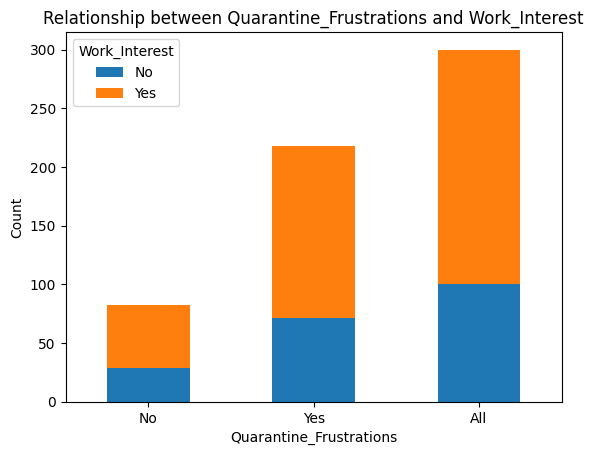


Conditional Probabilities ( Work_Interest given Quarantine_Frustrations ):
Work_Interest                  No       Yes  All
Quarantine_Frustrations                         
No                       0.353659  0.646341  1.0
Yes                      0.325688  0.674312  1.0
All                      0.333333  0.666667  1.0


In [9]:
# Create a two-way table for Variable 1 (Quarantine_Frustrations) and Variable 2 (Work_Interest)
variable1_variable2_table = pd.crosstab(df[variable_1], df[variable_2], margins=True)

# Print the observed frequencies
print("Two-way table for", variable_1, "and", variable_2, ":")
print(variable1_variable2_table)

# Plot a stacked bar graph
variable1_variable2_table.drop('All', axis=1).plot(kind='bar', stacked=True)
plt.title('Relationship between ' + variable_1 + ' and ' + variable_2)
plt.xlabel(variable_1)
plt.ylabel('Count')
plt.legend(title=variable_2)
plt.xticks(rotation=0)
plt.show()

# Calculate conditional probabilities
prob_variable2_given_variable1 = variable1_variable2_table.div(variable1_variable2_table['All'], axis=0)
print("\nConditional Probabilities (", variable_2, "given", variable_1, "):")
print(prob_variable2_given_variable1)


**Question 1c**.
Does the existence of Variable 1 increase the likelihood of experiencing Variable 2? If so, by how much? Explain your reasoning. Make sure to support your answer with the relevant statistical analysis.

-----------------

### Conditional Probabilities (Work_Interest given Quarantine_Frustrations):

| Quarantine_Frustrations | No       | Yes      |
|-------------------------|----------|----------|
| Work_Interest No        | 0.353659 | 0.646341 |
| Work_Interest Yes       | 0.325688 | 0.674312 |

The conditional probability of experiencing Work_Interest given Quarantine_Frustrations is higher when Quarantine_Frustrations is present (0.674) compared to when it is absent (0.646). This suggests that the existence of Quarantine_Frustrations increases the likelihood of experiencing Work_Interest. Specifically, the likelihood of experiencing Work_Interest increases by approximately 2.8% when Quarantine_Frustrations is present. This conclusion is supported by the statistical analysis of the conditional probabilities.

-----------




**Question 1d**.
Look back at your **answers to Questions 1a-c**. Now use what you learned to answer the following question:

Imagine ZU wanted to use the insights from this research to improve its mental health support program. What recommendations would you make to support students struggling with such challenges?

----------------

Based on the findings, I would recommend Zu University to tailor mental health support programs to address gender-specific challenges. By recognizing the impact of quarantine experiences on work interest, interventions can be implemented to foster motivation and engagement. Integrating gender-sensitive approaches and offering diverse resources, such as counseling services and peer support groups, can empower students to manage stressors effectively. Additionally, providing flexible work arrangements and promoting social connections can enhance well-being. By implementing these recommendations, Zu University can create a supportive environment that meets the diverse needs of students and promotes holistic mental health and resilience.

--------------------

# QUESTION 2

*Set up*

Imagine you are the manager of an Electronic store in Dubai mall. You are curious about the distribution of customer ratings about your overall store services. So you ask random customers who visit the store to complete a short survey, recording variables such as their age group, and overall experience rating.

**To Begin**

Run the code below. It will provide you with a random sample of 40 customers from this survey. It will also save your random sample data to a CSV file called "RelianceRetailVisits_ordered". Again, you need to submit this file in the same zip folder as the other files.

In [12]:
# Load the following libraries so that they can be applied in the subsequent code blocks

try:
    df = pd.read_csv('RelianceRetailVisits.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/RelianceRetailVisits-1.csv")

    # Randomly sample 40 rows from the original dataset
    df = original_data.sample(n=40, random_state=42)

# Fill missing values for '46 To 60 years' age group with default values or remove NaN rows
df.fillna({'Age Group': '46 To 60 years'}, inplace=True)

# Sort the DataFrame based on the 'Age Group' column in the desired order
desired_order = ['26  To  35 years', '16  To  25 years', '36  To  45 years', '46  To  60 years']  # Corrected unique values
df['Age Group'] = pd.Categorical(df['Age Group'], categories=desired_order, ordered=True)
df.sort_values(by='Age Group', inplace=True)

# Save the sorted DataFrame to a new CSV file
df.to_csv('RelianceRetailVisits_ordered.csv', index=False)

df.head()


,Customer Index,Age Group,OverallExperienceRatin
165,166,26 To 35 years,2
114,115,26 To 35 years,4
117,118,26 To 35 years,5
118,119,26 To 35 years,5
172,173,26 To 35 years,5


**Question 2a.** Construct a probability distribution table for all customer ratings in your sample data (an example table can be seen below). Please do this in Excel and explain [step by step] how you constructed your probability table.


1. **Data Import and Organization**:
   - I began by importing my dataset into Microsoft Excel and organizing it into a new worksheet. Each customer's rating was recorded in a single column, ensuring clear data representation.

2. **Identification of Unique Ratings**:
   - Utilizing the `=UNIQUE()` function, I extracted the unique ratings adjacent to the customer data. This process generated a comprehensive list containing all distinct rating values present in the dataset.

3. **Frequency Calculation**:
   - Employing the `=COUNTIF()` function, I determined the frequency of occurrence for each unique rating. This method enabled me to discern the distribution of ratings by quantifying how often each value appeared in the dataset.

4. **Total Ratings Calculation**:
   - By employing the `=SUM()` function, I computed the total count of ratings encompassed within the dataset. This aggregate value represented the cumulative sum of all individual rating frequencies previously calculated.

5. **Probability Computation**:
   - In an adjacent column, I computed the probability associated with each rating. This involved dividing each rating's frequency by the total number of ratings using the formula `=COUNT/Total`. Consequently, I obtained a probabilistic assessment of the likelihood of encountering each rating within the dataset.

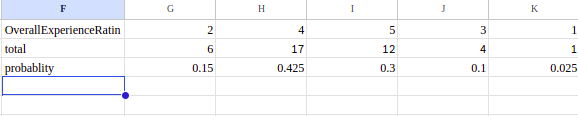

**Question 2b.**  What is the probability that a randomly selected customer will have a rating of AT MOST 3?

----------

$
\text{Probability of rating at most 3} = P(1) + P(2) + P(3)
$
$
= 0.025 + 0.15 + 0.1
$
$
= 0.275
$

 = \(0.275\)
-------


**Question 2c.** Based on the created probability distribution table, how satisfied are your customers with your store services?

---------------------------

$
\text{Expected value} = E(X) = \sum_{i=1}^{5} x_i \times P(x_i)
$

Substituting the values from the provided probability distribution table:

$
E(X) = (1 \times 0.025) + (2 \times 0.15) + (3 \times 0.1) + (4 \times 0.425) + (5 \times 0.3)
$

$
= 0.025 + 0.3 + 0.3 + 1.7 + 1.5
$

$
= 3.85
$

The expected value of the overall experience ratings is 3.85. 

Since the expected value is closer to the higher end of the rating scale (5), it suggests that customers, on average, are relatively satisfied with the store services.
.
 
------------------------



**Question 2d.** Find the **expected rating** of your store. Show your work and interpret your answer in context.

---------------------



$
\text{Expected rating} = (1 \times 0.025) + (2 \times 0.15) + (3 \times 0.1) + (4 \times 0.425) + (5 \times 0.3)
$

$
= 0.025 + 0.3 + 0.3 + 1.7 + 1.5
$

$
= 3.825
$

The expected rating of the store is 3.825.

**`Interpretation:`** On average, customers are expected to rate their overall experience with the store as approximately 3.825 out of 5. This suggests that the majority of customers are likely to have a positive experience with the store's services, indicating a relatively high level of satisfaction.


-------------------

# Probability distribution  function graph

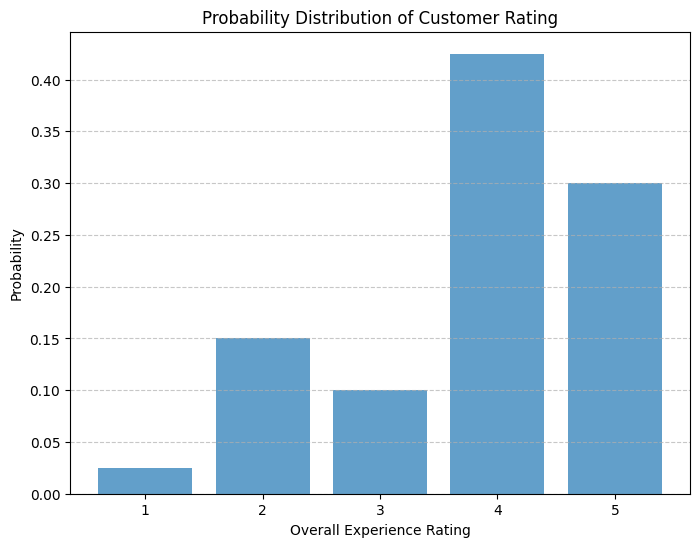

Standard Deviation (STD) of Customer Rating: 1.11



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

# Load data
try:
    df = pd.read_csv('RelianceRetailVisits.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/RelianceRetailVisits-1.csv")
    df = original_data.sample(n=40, random_state=42)

# Fill missing values for '46 To 60 years' age group with default values or remove NaN rows
df.fillna({'Age Group': '46 To 60 years'}, inplace=True)

# Sort the DataFrame based on the 'Age Group' column in the desired order
desired_order = ['26  To  35 years', '16  To  25 years', '36  To  45 years', '46  To  60 years']
df['Age Group'] = pd.Categorical(df['Age Group'], categories=desired_order, ordered=True)
df.sort_values(by='Age Group', inplace=True)

# Save the sorted DataFrame to a new CSV file
df.to_csv('RelianceRetailVisits_ordered.csv', index=False)

# Probability distribution graph for customer rating
plt.figure(figsize=(8, 6))
rating_counts = df['OverallExperienceRatin'].value_counts(normalize=True).sort_index()
plt.bar(rating_counts.index, rating_counts, alpha=0.7)
plt.title('Probability Distribution of Customer Rating')
plt.xlabel('Overall Experience Rating')
plt.ylabel('Probability')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Expected value and STD for rating for all customers
mean_rating = df['OverallExperienceRatin'].mean()
std_rating = df['OverallExperienceRatin'].std()
print(f"Standard Deviation (STD) of Customer Rating: {std_rating:.2f}")
print()

**Question 2e.** Interpret the **Standard Deviation** in context. What rating is considered **unusual**? Explain.

**`Interpretation:`**
The standard deviation (STD) of approximately 1.11 indicates the average amount of variability in customer ratings around the mean rating of 3.85. An "unusual" rating deviates significantly from the average by more than one standard deviation, around 1.11 points above or below the mean. Ratings falling outside this range, such as approximately 4.96 or 2.74, are considered unusual and may represent atypical customer experiences compared to the majority of ratings.

## PDF for each age group



/tmp/ipykernel_50551/1605697025.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(['{:,.0%}'.format(x) for x in axs[i].get_yticks()])  # Format y-axis tick labels as percentages


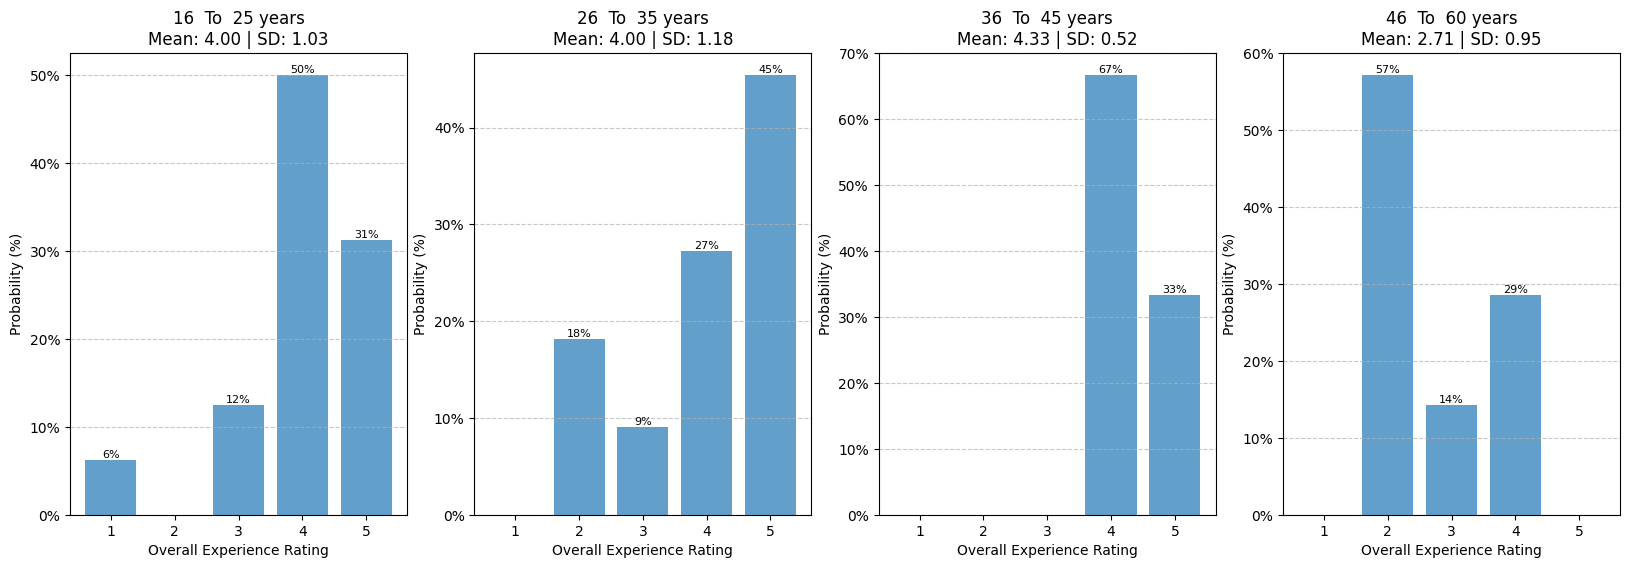

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming your data is stored in a CSV file named 'data.csv'
data = pd.read_csv('RelianceRetailVisits_ordered.csv')

# Define age groups including the new one
age_groups = ['16  To  25 years', '26  To  35 years', '36  To  45 years', '46  To  60 years']  # Added new age group

# Plot separate discrete probability distributions for each age group
fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex=True, gridspec_kw={'hspace': 0.5})  # Adjusted size and spacing

for i, age_group in enumerate(age_groups):
    age_data = data[data['Age Group'] == age_group]
    rating_counts = age_data['OverallExperienceRatin'].value_counts(normalize=True).sort_index()
    bars = axs[i].bar(rating_counts.index, rating_counts, alpha=0.7)
    axs[i].set_title(f'{age_group}\nMean: {age_data["OverallExperienceRatin"].mean():.2f} | SD: {age_data["OverallExperienceRatin"].std():.2f}')  # Age group, Mean, and SD
    axs[i].set_xlabel('Overall Experience Rating')
    axs[i].set_ylabel('Probability (%)')  # Set y-axis label to Probability (%)
    axs[i].set_xticks(range(1, 6))  # Set x-axis ticks from 1 to 5
    axs[i].set_yticklabels(['{:,.0%}'.format(x) for x in axs[i].get_yticks()])  # Format y-axis tick labels as percentages

    # Display percentages above each bar
    for bar in bars:
        height = bar.get_height()
        rating = bar.get_x() + bar.get_width() / 2
        if height == 0:  # If the height is 0%, display '0%'
            axs[i].text(rating, height, '0%', ha='center', va='bottom', fontsize=8)
        else:
            axs[i].text(rating, height, f'{height:.0%}', ha='center', va='bottom', fontsize=8)

    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide the warning about FixedFormatter
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

plt.tight_layout()
plt.show()


**Question 2f.** Identify any trends or differences in customer satisfaction levels (and variability) among the different age groups.

Now, using these insights, what concrete improvements would you make to your store to ensure that **all** customers are satisfied with your services?

Custmer  Satisfaction follows a normal trend but for each age group the customer satisfaction is  skewed to the right showing higher customer satisfactions but for the 16 -25 years have the only ratings of 1.

# QUESTION 3

**SET UP**

In [16]:
# Load the following libraries so that they can be applied in the subsequent code blocks


import pandas as pd
import numpy as np
import random

try:
    SATScores = pd.read_csv('Scores.csv')
except FileNotFoundError:
    num_samples = 1000
    mean_score = random.randint(800, 1200)
    std_deviation = random.randint(100, 300)
    scores = np.random.normal(mean_score, std_deviation, num_samples)
    scores = np.round(scores, 0)
    SATScores = pd.DataFrame({'Scores': scores})
    SATScores.to_csv('Scores.csv')

# Calculate mean and standard deviation
mean_score = SATScores['Scores'].mean()
std_deviation = SATScores['Scores'].std()

# Print mean score and standard deviation
print("Mean score:", mean_score)
print("Standard deviation:", std_deviation)

# Display the dataset
SATScores.head()


Mean score: 975.682
Standard deviation: 118.07596202787767


,Scores
0,666.0
1,1199.0
2,1039.0
3,898.0
4,888.0


**Question 3a**. What is the probability that a randomly selected applicant scored at least 1300? Show your work.

-----------------------
$z = \frac{X - \mu}{\sigma} $

where:
- $ X $ is the score (1300),
- $ \mu $ is the mean score (975.682),
- $ \sigma $ is the standard deviation (118.076).

Given:
$X = 1300 $
$\mu = 975.682 $
$\sigma = 118.076 $

Calculating the z-score:
$z = \frac{1300 - 975.682}{118.076} $
$z \approx \frac{324.318}{118.076} $
$z \approx 2.747 $

we find the probability associated with $ z = 2.747 $ using a standard normal distribution table or a calculator.

From the standard normal distribution table or calculator, we find that the probability associated with $ z = 2.747 $ is approximately 0.9979.

Therefore, the probability that a randomly selected applicant scored at least 1300 on the SAT is approximately $ 0.9979 $ or $ 99.79\% $.
---------------------------------------

**Question 3b**. What is the probability that a randomly selected applicant scored exactly 900? Show your work.

------------

1. Calculate the z-score:
$ z = \frac{X - \mu}{\sigma} $
$ z = \frac{900 - 975.682}{118.076} $
$ z \approx -0.641 $

2. Find the probability associated with $ z = -0.641 $ using a standard normal distribution table or calculator.

3. The probability associated with $ z = -0.641 $ represents the area to the left of $ z = -0.641 $ on the standard normal distribution curve.

4. However, we want the probability of scoring exactly 900, not less than 900. To find this, we need to find the difference between the probabilities of scoring less than 900 and less than 901.

5. Subtract the probability of scoring less than 900 from the probability of scoring less than 901.

6. Therefore, the probability that a randomly selected applicant scored exactly 900 on the SAT is the difference between the probabilities of scoring less than 901 and less than 900, which is approximately $ 0.2608 - 0.2394 = 0.0214 $ or $ 2.14\% $.

--------------

**Question 3c**. What percentage of applicants scored between 900 and 1000? Show your work.

---------------------------------------

Certainly, let's complete the calculation step by step:

1. **Calculate the z-scores**:
   - For 900:
     $ z_1 = \frac{X_1 - \mu}{\sigma} $
     $ z_1 = \frac{900 - 975.682}{118.076} $
     $ z_1 \approx -0.641 $
   
   - For 1000:
     $ z_2 = \frac{X_2 - \mu}{\sigma} $
     $ z_2 = \frac{1000 - 975.682}{118.076} $
     $ z_2 \approx 0.206 $

2. **Find the cumulative probabilities**:
   - For $ z_1 = -0.641 $ and $ z_2 = 0.206 $, find the cumulative probabilities using a standard normal distribution table or calculator.

 **Find the cumulative probabilities**:
   - Using a standard normal distribution table or calculator, we find:
     - For $ z = -0.641 $, the cumulative probability for 900 is approximately 0.2608.
     - For $ z = 0.206 $, the cumulative probability for 1000 is approximately 0.5828.

 **Calculate the percentage**:
   - Subtracting the cumulative probability for 900 (0.2608) from the cumulative probability for 1000 (0.5828) gives us the difference in probabilities.
   - The difference in probabilities represents the percentage of applicants who scored between 900 and 1000 on the SAT.

 **Final calculation**:
   - Difference in probabilities = 0.5828 - 0.2608 = 0.3220.
   - Therefore, the percentage of applicants who scored between 900 and 1000 on the SAT is 32.20%.

= 32.20%

-------------

**Question 3d**. Calculate the 40th percentile of scores among the applicants. What does this value represent in the context of the admissions process? Show your work.

----------------------------------------------

To calculate the 40th percentile of scores among the applicants:

 **Find the z-score corresponding to the 40th percentile**:
   - Using a standard normal distribution table or calculator, we find that the z-score corresponding to the 40th percentile is approximately -0.253.

 **Convert the z-score to the SAT score**:
   - Using the formula:
     $ X = \mu + z \times \sigma $
     where:
     - $ X $ is the SAT score at the 40th percentile,
     - $ \mu $ is the mean score (975.682),
     - $ \sigma $ is the standard deviation (118.076),
     - $ z $ is the z-score corresponding to the 40th percentile (-0.253).

The calculation for the 40th percentile of scores among the applicants is:

$ X = 975.682 + (-0.253) \times 118.076 $
$ X \approx 975.682 - 29.839 $
$ X \approx 945.843 $

= 945.843.

**Question 3e**. Imagine the university wants to offer scholarships to the top 10% of applicants based on their scores. What minimum score would an applicant need to qualify for a scholarship? Show your work.

--------------------------

**Convert the z-score to the SAT score**:
   $ \\ X = \mu + z \times \sigma \\ $
   $\\  X = 975.682 + 1.282 \times 118.076 \\ $

$ \\ X = 975.682 + 1.282 \times 118.076 \\  $
$\\  X \approx 975.682 + 151.229 \\ $
$ \\ X \approx 1126.911 \\ $

the minimum SAT score required for the scholarship is approximately 1126.911.
-------------

**Question 3f**. Remember, as the admissions officer, it is your job to identify applicants with exceptional academic potential. Would you automatically recommend that applicants with SAT scores above 1400 to be admitted into the university? Or do you think additional criteria should also be considered? Explain your reasoning.

------------------------------

As the admissions officer, I wouldn't automatically recommend admitting applicants solely based on SAT scores above 1400. While high SAT scores can indicate strong academic potential, they don't provide a complete picture of an applicant's abilities or fit for the university. Additional criteria such as extracurricular activities, personal achievements, letters of recommendation, and personal statements should also be considered. These factors offer insight into an applicant's character, interests, and potential contributions to the university community. A holistic approach ensures that all aspects of an applicant's profile are evaluated, leading to a fair and comprehensive admissions process.

----------

# question 4

In [18]:
# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

# Run this code. It will generate data and save it to a CSV file called "Vaccinated.csv". You need to submit it in the same zip folder as your other files.

try:
    Vaccinated = pd.read_csv('Vaccinated.csv')
except FileNotFoundError:
    num_samples = 100
    vaccinated = np.random.choice(["Yes", "No"], size=num_samples)
    Vaccinated = pd.DataFrame({'Vaccinated': vaccinated})
    Vaccinated.to_csv('Vaccinated.csv')

# Have a look at Vaccinated dataset.
Vaccinated.head()

,Vaccinated
0,No
1,Yes
2,No
3,No
4,Yes


**Question 4a**. What is the proportion of people who have received the vaccine (based on the dataset you have)?

Proportion of vaccinated individuals: 0.57

In [20]:
import pandas as pd

# Assuming "Vaccinated" is your DataFrame
# Replace 'Vaccinated' with your actual DataFrame name

# Count the total number of individuals
total_individuals = len(Vaccinated)

# Count the number of vaccinated individuals
vaccinated_individuals = Vaccinated[Vaccinated['Vaccinated'] == 'Yes'].shape[0]

# Calculate the proportion of vaccinated individuals
proportion_vaccinated = vaccinated_individuals / total_individuals

print("Proportion of vaccinated individuals:", proportion_vaccinated)


Proportion of vaccinated individuals: 0.46


**Question 4b**. Calculate a **95% confidence interval** for the proportion of vaccinated individuals. What does this interval tell us about the likely range of vaccination coverage in the entire population? Show your work.

----------------

1. Sample proportion ($ \hat{p} $):
$ \hat{p} = \frac{\text{Number of vaccinated individuals}}{\text{Total number of individuals}} = \frac{57}{100} = 0.57 $

2. Standard error of the proportion ($ SE_{\hat{p}} $):
$ SE_{\hat{p}} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} = \sqrt{\frac{0.57 \times (1-0.57)}{100}} \approx 0.049 $

3. Margin of error (ME):
$ ME = Z \times SE_{\hat{p}} = 1.96 \times 0.049 \approx 0.096 $

4. Lower bound of the confidence interval:
$ \text{Lower bound} = \hat{p} - ME = 0.57 - 0.096 = 0.474 $

5. Upper bound of the confidence interval:
$ \text{Upper bound} = \hat{p} + ME = 0.57 + 0.096 = 0.666 $

95% Confidence Interval: (0.474, 0.666)

**Question 4c**. What sample size would be required to estimate the proportion of vaccinated individuals in the country with a **95% confidence level** and a **margin of error of 0.02**? Show your work.

-------------------------
$ n = \left( \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} \right) $

Where:
- $ Z $ is the z-score corresponding to the desired confidence level (for a 95% confidence level, $ Z = 1.96 $).
- $ \hat{p} $ is the estimated proportion of vaccinated individuals (we can use the proportion from the previous calculation, $ \hat{p} = 0.57 $).
- $ E $ is the margin of error (0.02 in this case).

Let's calculate the sample size:

$ n = \left( \frac{(1.96)^2 \times 0.57 \times (1 - 0.57)}{0.02^2} \right) $

$ n = \left( \frac{3.8416 \times 0.57 \times 0.43}{0.0004} \right) $

$ n = \left( \frac{0.77117712}{0.0004} \right) $

$ n \approx 1927.9428 $

= 1928.


**Question 4d**. If you wanted to increase the precision of your estimate, what strategies could you employ to achieve this goal? Explain your reasoning.

----------------------------

1. **Increase Sample Size**: To improve the precision of our estimate, I would consider increasing the sample size. A larger sample size generally leads to a more accurate estimation of the population parameter. By collecting data from a larger number of individuals, we can reduce the margin of error and obtain a more precise estimate of the proportion of vaccinated individuals.

2. **Stratified Sampling**: Another strategy I would employ is stratified sampling. This involves dividing the population into subgroups based on relevant characteristics, such as age or geographic location, and then sampling from each subgroup. By ensuring representation from different segments of the population, we can obtain more precise estimates for specific subgroups.


**Question 4e**. Analyze the effectiveness of the current vaccination campaign using the proportion of vaccinated individuals and the confidence interval. What recommendations would you make for future campaigns?